In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics

In [3]:
df = pd.read_csv('orders_20190822.csv', sep=";",index_col ="o_date", parse_dates=['o_date'],  decimal=',')  

In [4]:
df.head()

,id_o,user_id,price
o_date,,,
2016-01-01,1234491,337544,539.0
2016-01-01,1234494,171642,153.3
2016-01-01,1234497,260596,55.3
2016-01-01,1234498,1105609,752.5
2016-01-01,1234500,982696,4410.0


In [5]:
df1 = df[['price']]

In [6]:
weekly_resampled_data = df1.price.resample('D').mean() 

In [7]:
weekly_resampled_data.head()

o_date
2016-01-01    1846.431419
2016-01-02    2179.590305
2016-01-03    2043.522002
2016-01-04    2319.170931
2016-01-05    2023.681055
Freq: D, Name: price, dtype: float64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

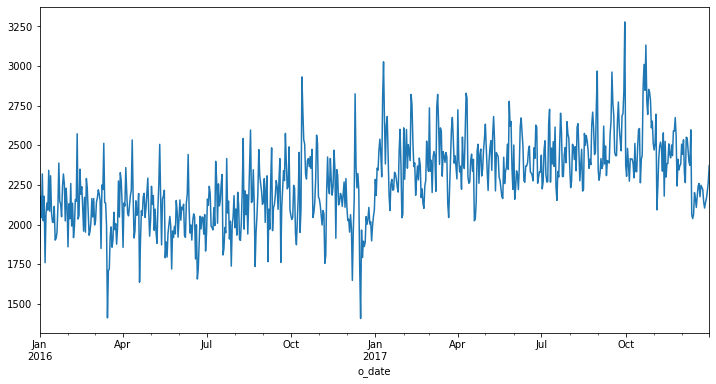

In [9]:
weekly_resampled_data.plot(figsize=(12,6))

In [12]:
y_hat_avg = weekly_resampled_data.copy()

In [14]:
fit1=sm.tsa.statespace.SARIMAX(weekly_resampled_data, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()

In [15]:

y_hat_avg['SARIMA'] = fit1.predict(start="2018-01-01", end="2018-12-31", dynamic=True)


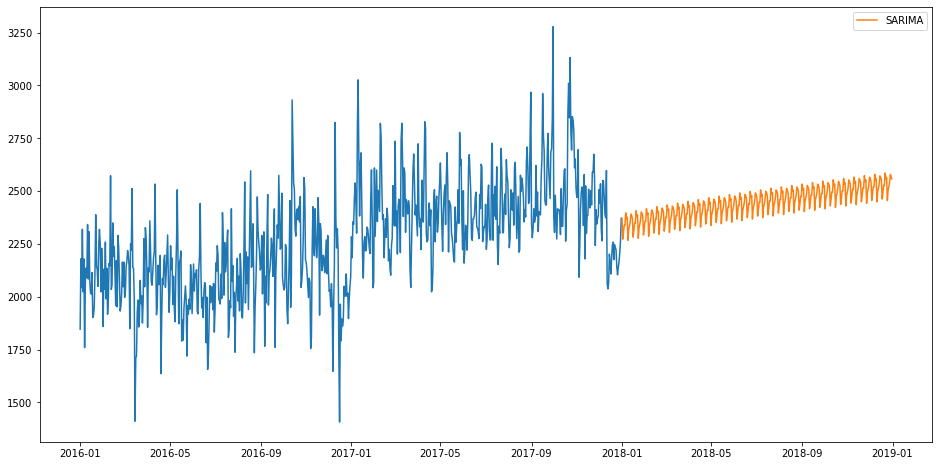

In [18]:
plt.figure(figsize=(16,8))
plt.plot(weekly_resampled_data)
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()